In [43]:
import re
from matplotlib import pyplot as plt
fapp = "250"
with open('networkmodel_250.ppl') as f:
    lines = f.readlines()

def process_geometry(geometry, n_networks):
    branches = []
    assert "BRANCH" in geometry[0], "Does not start with a BRANCH"
    geometry = '\t'.join(geometry).replace('\n','\t')
    geometry = re.sub(r'\s+', '\t', geometry)
    geometry = geometry.split('BRANCH')
    geometry = [x for x in geometry if x != '']
    assert len(geometry) == n_networks, f"Only {len(geometry)}/{n_networks} found"
    for branch in geometry:
        branch = [x for x in branch.split('\t') if x != '']
        branch_name = branch[0]
        branch_length = int(branch[1])
        branch_values = [float(x) for x in branch[2:]]
        branch_x = branch_values[:branch_length+1]
        branch_elevation = branch_values[branch_length+1:]
        branches.append({
            "name": branch_name,
            "length": branch_length,
            "x": branch_x,
            "elevation": branch_elevation
        })
    return branches
  
    
metadata = lines[:12]
n_networks = int(lines[13])
geometry = lines[15:56]
len_catalog = int(lines[57])
catalog = lines[58:58+len_catalog]
branches = process_geometry(geometry, n_networks)
time_series = lines[110:]
index = 0
series = []
while index < len(time_series):
    time = float(time_series[index])
    index += 1
    values = time_series[index: index+len_catalog]
    series.append({
        'time': time,
        'catalog': catalog,
        'values': [[float(y) for y in x.replace(' \n','').split(' ')] for x in values]
    })
    index += len_catalog
pt_indices = []
qg_indices = []

for i, line in enumerate(catalog):
    if line[:2] == 'PT':
        print(i, line)
        pt_indices.append(i)
for i, line in enumerate(catalog):
    if line[:3] == 'QG ':
        print(i, line)
        qg_indices.append(i)


14 PT 'SECTION:' 'BRANCH:' 'O4P-0_FLOWPATH' '(PA)' 'Pressure'

31 PT 'SECTION:' 'BRANCH:' 'O4P-1_FLOWPATH' '(PA)' 'Pressure'

48 PT 'SECTION:' 'BRANCH:' 'O4P-2_FLOWPATH' '(PA)' 'Pressure'

2 QG 'BOUNDARY:' 'BRANCH:' 'O4P-0_FLOWPATH' '(M3/S)' 'Gas volume flow'

19 QG 'BOUNDARY:' 'BRANCH:' 'O4P-1_FLOWPATH' '(M3/S)' 'Gas volume flow'

36 QG 'BOUNDARY:' 'BRANCH:' 'O4P-2_FLOWPATH' '(M3/S)' 'Gas volume flow'



'O4P-0_FLOWPATH'
'O4P-1_FLOWPATH'
'O4P-2_FLOWPATH'


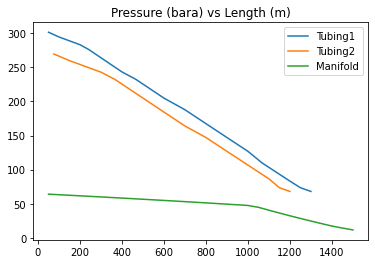

'O4P-0_FLOWPATH'
'O4P-1_FLOWPATH'
'O4P-2_FLOWPATH'


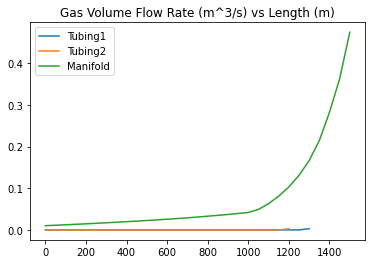

In [44]:
newnames = ("Tubing1", "Tubing2", "Manifold")

plt.title("Pressure (bara) vs Length (m)")
for branch, pt_index, name in zip(branches, pt_indices, newnames):
    print(branch['name'])
    # print('PT', last['values'][pt_index])
    PT = [x/101325.0 for x in last['values'][pt_index]]
    plt.plot(branch['x'][1:], PT, label=name)
    
plt.legend()
figname = "PT" + fapp + ".png"
plt.savefig(figname)
plt.show()
plt.title("Gas Volume Flow Rate (m^3/s) vs Length (m)")
for branch, pt_index, qg_index, name in zip(branches, pt_indices, qg_indices, newnames):
    print(branch['name'])
    QG = last['values'][qg_index]
    plt.plot(branch['x'], QG, label=name)
plt.legend()
figname = "QG" + fapp + ".png"
plt.savefig(figname)
plt.show()


In [45]:
def get_index_by_key(catalog, key):
    indices = []
    for i, line in enumerate(catalog):
        if line[:len(key)+1] == key+' ':
            indices.append(i)
    return indices

keys = [
    'PT',
    'QGST',
    'QWST',
    'QOST',
    'QLTWT',
    'QLTHL',
    'USG',
    'USLTHL',
    'USLTWT'
]
i = [1,1,1,1,1,1,-1,-1,-1]

for key,position in zip(keys, i):
    indices = get_index_by_key(catalog, key)
    print(key, indices)
    for line_no,branch in zip(indices, branches):
        last = series[-1]
        line = last['values'][line_no]
        print(branch['name'], line[position])

PT [14, 31, 48]
'O4P-0_FLOWPATH' 33742850.0
'O4P-1_FLOWPATH' 29819610.0
'O4P-2_FLOWPATH' 6984436.0
QGST [3, 20, 37]
'O4P-0_FLOWPATH' 3.47199
'O4P-1_FLOWPATH' 3.471992
'O4P-2_FLOWPATH' 6.946302
QWST [8, 25, 42]
'O4P-0_FLOWPATH' 0.02976139
'O4P-1_FLOWPATH' 0.0297614
'O4P-2_FLOWPATH' 0.05947617
QOST [6, 23, 40]
'O4P-0_FLOWPATH' 0.06944538
'O4P-1_FLOWPATH' 0.06944541
'O4P-2_FLOWPATH' 0.1389374
QLTWT [5, 22, 39]
'O4P-0_FLOWPATH' 0.02942498
'O4P-1_FLOWPATH' 0.02946867
'O4P-2_FLOWPATH' 0.05958249
QLTHL [4, 21, 38]
'O4P-0_FLOWPATH' 0.07729861
'O4P-1_FLOWPATH' 0.077322
'O4P-2_FLOWPATH' 0.1550282
USG [9, 26, 43]
'O4P-0_FLOWPATH' 0.0
'O4P-1_FLOWPATH' 0.0
'O4P-2_FLOWPATH' 16.23763
USLTHL [10, 27, 44]
'O4P-0_FLOWPATH' 9.936769
'O4P-1_FLOWPATH' 9.936764
'O4P-2_FLOWPATH' 4.50999
USLTWT [11, 28, 45]
'O4P-0_FLOWPATH' 3.790323
'O4P-1_FLOWPATH' 3.790321
'O4P-2_FLOWPATH' 1.9004
